In [2]:


# Imports
import collections
import os
import tarfile

from matplotlib import rc
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tqdm

from waymo_open_dataset.protos import scenario_pb2
from waymo_open_dataset.protos import sim_agents_submission_pb2
from waymo_open_dataset.utils import trajectory_utils
from waymo_open_dataset.utils.sim_agents import submission_specs
from waymo_open_dataset.utils.sim_agents import visualizations
from waymo_open_dataset.wdl_limited.sim_agents_metrics import metric_features
from waymo_open_dataset.wdl_limited.sim_agents_metrics import metrics

# Set matplotlib to jshtml so animations work with colab.
rc('animation', html='jshtml')
     


2025-06-04 22:31:06.800609: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-04 22:31:06.970304: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-04 22:31:06.971835: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-06-04 22:31:08.376915: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [ ]:
from torchinfo import summary
from 

In [3]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
print("PyTorch version:", torch.__version__)
print("CUDA available:", torch.cuda.is_available())
print("CUDA device name:", torch.cuda.get_device_name(0))
print("CUDA version:", torch.version.cuda)
(samples, timesteps, features) = (100, 10, 5)

PyTorch version: 2.0.1+cu117
CUDA available: True
CUDA device name: Tesla V100-PCIE-32GB
CUDA version: 11.7


In [ ]:
import numpy as np

# Example: 'data' shape = (total_timesteps, 2) --> [x, y] per frame
def make_sliding_sequences(data, input_len=10, output_len=80, stride=1):
    X, Y = [], []
    for i in range(0, len(data) - input_len - output_len + 1, stride):
        x_seq = data[i : i + input_len]
        y_seq = data[i + input_len : i + input_len + output_len]
        X.append(x_seq)
        Y.append(y_seq)
    return np.array(X), np.array(Y)

# sequencial data
data = 

array([ 0.00000000e+00,  9.99330162e-02,  1.98865536e-01,  2.95807081e-01,
        3.89787104e-01,  4.79864709e-01,  5.65138069e-01,  6.44753455e-01,
        7.17913784e-01,  7.83886601e-01,  8.42011406e-01,  8.91706275e-01,
        9.32473678e-01,  9.63905466e-01,  9.85686954e-01,  9.97600074e-01,
        9.99525555e-01,  9.91444120e-01,  9.73436677e-01,  9.45683512e-01,
        9.08462478e-01,  8.62146222e-01,  8.07198446e-01,  7.44169268e-01,
        6.73689717e-01,  5.96465408e-01,  5.13269488e-01,  4.24934884e-01,
        3.32345974e-01,  2.36429728e-01,  1.38146426e-01,  3.84800478e-02,
       -6.15715795e-02, -1.61006773e-01, -2.58830020e-01, -3.54061947e-01,
       -4.45749125e-01, -5.32973611e-01, -6.14862143e-01, -6.90594881e-01,
       -7.59413613e-01, -8.20629350e-01, -8.73629220e-01, -9.17882606e-01,
       -9.52946458e-01, -9.78469728e-01, -9.94196886e-01, -9.99970476e-01,
       -9.95732696e-01, -9.81525973e-01, -9.57492539e-01, -9.23873010e-01,
       -8.81003973e-01, -

In [4]:
# Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Generate real sine wave data
x_vals = np.linspace(0, 100, 1000)
data = np.sin(x_vals)

# Prepare sequences
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i+seq_length]
        y = data[i+1:i+seq_length+1]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

seq_length = 50
X, Y = create_sequences(data, seq_length)

# Convert to PyTorch tensors
X_tensor = torch.tensor(X, dtype=torch.float32).unsqueeze(-1).to(device)  # shape: (batch, seq_len, 1)
Y_tensor = torch.tensor(Y, dtype=torch.float32).unsqueeze(-1).to(device)


In [6]:

# Define the LSTM model
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super().__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.linear = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(num_layers, x.size(0), hidden_size).to(device)
        c0 = torch.zeros(num_layers, x.size(0), hidden_size).to(device)
        out, _ = self.lstm(x, (h0, c0))
        out = self.linear(out)
        return out



Epoch 10/100, Loss: 0.054976
Epoch 20/100, Loss: 0.012914
Epoch 30/100, Loss: 0.010104
Epoch 40/100, Loss: 0.006292
Epoch 50/100, Loss: 0.005360
Epoch 60/100, Loss: 0.004169
Epoch 70/100, Loss: 0.003379
Epoch 80/100, Loss: 0.002717
Epoch 90/100, Loss: 0.002272
Epoch 100/100, Loss: 0.001933


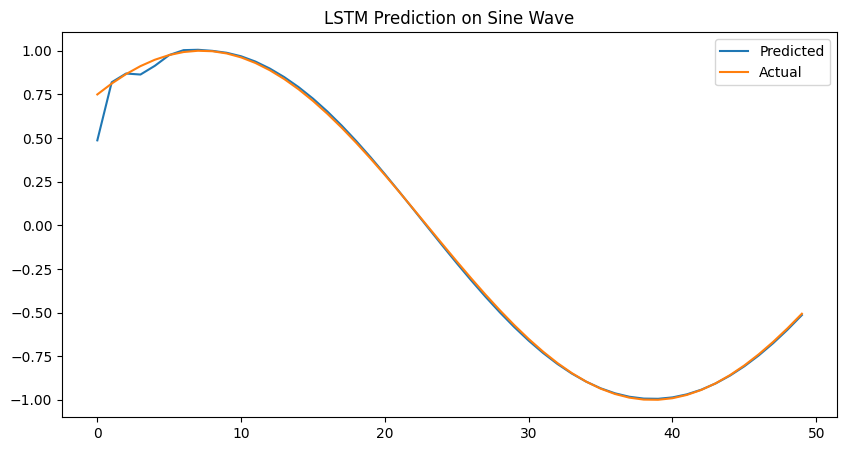

tensor([[[ 0.6796],
         [ 0.7495],
         [ 0.8119],
         [ 0.8662],
         [ 0.9118],
         [ 0.9483],
         [ 0.9752],
         [ 0.9925],
         [ 0.9997],
         [ 0.9970],
         [ 0.9843],
         [ 0.9617],
         [ 0.9295],
         [ 0.8880],
         [ 0.8377],
         [ 0.7789],
         [ 0.7123],
         [ 0.6386],
         [ 0.5585],
         [ 0.4728],
         [ 0.3824],
         [ 0.2881],
         [ 0.1910],
         [ 0.0919],
         [-0.0080],
         [-0.1079],
         [-0.2067],
         [-0.3035],
         [-0.3972],
         [-0.4869],
         [-0.5717],
         [-0.6509],
         [-0.7235],
         [-0.7888],
         [-0.8463],
         [-0.8953],
         [-0.9353],
         [-0.9660],
         [-0.9870],
         [-0.9981],
         [-0.9992],
         [-0.9904],
         [-0.9716],
         [-0.9430],
         [-0.9051],
         [-0.8581],
         [-0.8024],
         [-0.7388],
         [-0.6677],
         [-0.5900]]]

In [ ]:

# Hyperparameters
input_size = 1
hidden_size = 64
num_layers = 1
output_size = 1
learning_rate = 0.01
num_epochs = 100

# Initialize model, loss, and optimizer
model = LSTMModel(input_size, hidden_size, num_layers, output_size).to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Train the model
for epoch in range(num_epochs):
    model.train()
    output = model(X_tensor)
    loss = criterion(output, Y_tensor)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.6f}")

# Evaluate on the last sequence
model.eval()
with torch.no_grad():
    test_input = X_tensor[-1:].to(device)
    predicted = model(test_input).cpu().numpy().flatten()
    target = Y_tensor[-1:].cpu().numpy().flatten()

# Plot predictions
plt.figure(figsize=(10, 5))
plt.plot(predicted, label='Predicted')
plt.plot(target, label='Actual')
plt.legend()
plt.title('LSTM Prediction on Sine Wave')
plt.show()
#show input and output


In [10]:
test_input.shape, predicted.shape, target.shape

(torch.Size([1, 50, 1]), (50,), (50,))